<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/6_Various_ML_model_with_Diabetes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

### 1. 필요한 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. 데이터셋 로드

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/부스트코스/data/diabetes_feature.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [4]:
df.shape

(768, 16)

### 3. 학습과 예측에 사용할 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
# features (지난번에 결과가 좋았던 feature들만 사용)
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]

X.shape
# (Pregnancies, Outcome, Age_low, Age_middle, Age_high, Insulin_log, Insulin 제외함)

(768, 9)

In [7]:
# label
y = df["Outcome"]
y.shape

(768,)

In [8]:
# 랜덤하게 뽑아 학습/예측 데이터셋 만들기 (random_state를 적용하면 seed가 고정됨)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [9]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
60,84,0,0,0.0,0.304,21,False,102.5,True
618,112,82,24,28.2,1.282,50,True,169.5,False
346,139,46,19,28.7,0.654,22,False,83.0,False
294,161,50,0,21.9,0.254,65,False,102.5,False
231,134,80,37,46.2,0.238,46,False,370.0,False


In [10]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [11]:
X_test.shape, y_test.shape

((154, 9), (154,))

### 4. 학습과 예측하기

#### *결정 트리

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_predict = model.predict(X_test)
y_predict[:5] # 예측값 미리 보기

array([0, 0, 0, 0, 0])

In [15]:
# 다르게 예측한 개수 (diff_count)
diff_count = (y_predict != y_test).sum()
diff_count

28

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8181818181818182

#### *랜덤 포레스트

In [17]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state=42) # n_estimator: 트리 개수
model1

RandomForestClassifier(random_state=42)

In [18]:
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_predict1 = model1.predict(X_test)
y_predict1[:5]

array([1, 0, 0, 0, 0])

In [20]:
diff_count1 = (y_predict1 != y_test).sum()
diff_count1
# (cf. 결정트리: 28개)

20

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict1)
# (cf. 결정트리: 0.8181818181818182)

0.8701298701298701

In [22]:
model1.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

<ipython-input-23-bfb0961b5c27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model1.feature_importances_, y=feature_names, palette="tab10")


<Axes: >

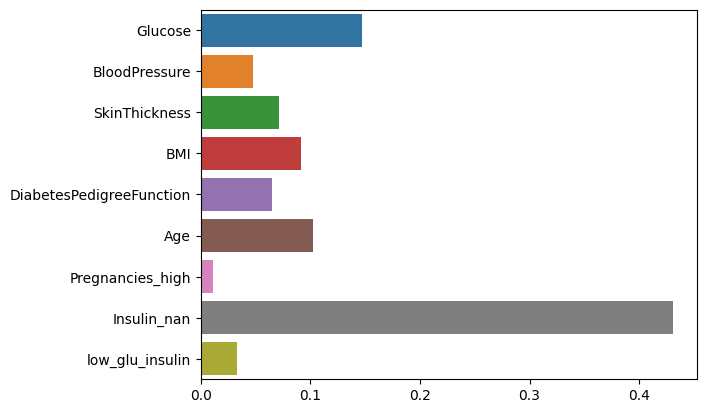

In [23]:
# 결정트리와 다르게 랜덤 포레스트는 트리가 많아 시각화가 어려우므로,
# 대신 feature importance를 시각화한다.

feature_names = X_train.columns.tolist()
sns.barplot(x=model1.feature_importances_, y=feature_names, palette="tab10")

#### *Boosting



bagging: 여러 트리를 랜덤하게 그림 / 예) random forest<br>
boosting: 가중치를 더하여 트리를 그리고, 이걸 바탕으로 다른 트리를 그림 (반복)

<img src = "https://quantdare.com/wp-content/uploads/2016/04/bb3-1150x441.png" height = 200 width = 500>

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier()
model2

GradientBoostingClassifier()

In [25]:
model2.fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
y_predict2 = model2.predict(X_test)
y_predict2[:5]

array([1, 0, 0, 0, 0])

In [27]:
diff_count2 = (y_predict2 != y_test).sum()
diff_count2
# (cf. 결정트리: 28)
# (cf. 랜덤 포레스트: 20)

24

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict2)
# (cf. 결정트리: 0.8181818181818182)
# (cf. 랜덤 포레스트: 0.8701298701298701)

0.8441558441558441

In [29]:
model2.feature_importances_

array([1.07116540e-01, 7.01838554e-03, 6.53670290e-02, 3.68286461e-02,
       2.51127578e-02, 9.59729601e-02, 1.56708089e-04, 6.62426973e-01,
       0.00000000e+00])

<ipython-input-30-8f4daae5cc5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model2.feature_importances_, y=feature_names, palette="tab10")


<Axes: >

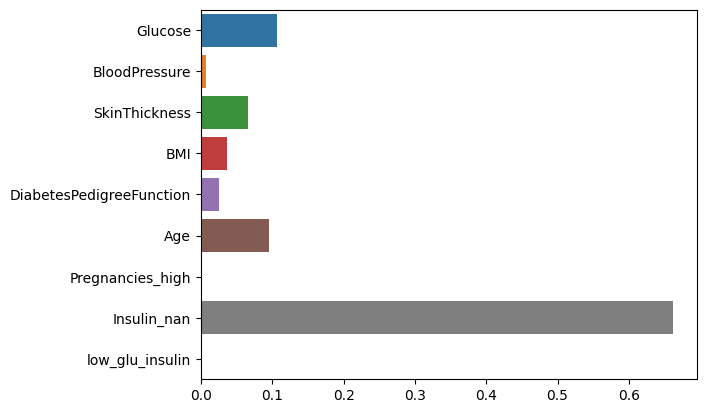

In [30]:
feature_names = X_train.columns.tolist()
sns.barplot(x=model2.feature_importances_, y=feature_names, palette="tab10")

### 5. 여러 개의 알고리즘을 사용해서 비교하기

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [46]:
for estimator in estimators:
  print(estimator.__class__.__name__)

DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier


In [59]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
                       "max_features": max_features}

results = []

for estimator in estimators:
  result = []
  if estimator.__class__.__name__ != "DecisionTreeClassifier":
    param_distributions["n_estimators"] = np.random.randint(100, 1000, 10)
  clf = RandomizedSearchCV(estimator,  ##### estimators 아니고 estimator !!!!!!!!!
                    param_distributions,
                    n_iter=10,
                    scoring="accuracy",
                    n_jobs=-1,
                    cv=5,
                    verbose=2)

  clf.fit(X_train, y_train)
  result.append(estimator.__class__.__name__) # estimator name
  result.append(clf.best_params_) # 최적의 hyperparameter
  result.append(clf.best_score_) # train score
  result.append(clf.score(X_test, y_test)) # test score
  result.append(clf.cv_results_) # cv 결과
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [61]:
report = pd.DataFrame(results, columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

In [65]:
report

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.5894350105162489, 'max_dept...",0.866480,0.837662,"{'mean_fit_time': [0.006449079513549805, 0.006..."
1,RandomForestClassifier,"{'n_estimators': 395, 'max_features': 0.931447...",0.905558,0.857143,"{'mean_fit_time': [2.0004750728607177, 1.92194..."
2,GradientBoostingClassifier,"{'n_estimators': 217, 'max_features': 0.482566...",0.902332,0.850649,"{'mean_fit_time': [1.6673014640808106, 0.95323..."


In [68]:
pd.DataFrame(report.loc[1, "cv_result"]).sort_values(by="rank_test_score") # RandomForest의 cv result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.454202,0.022385,0.045527,0.004613,395,0.931448,14,"{'n_estimators': 395, 'max_features': 0.931447...",0.886179,0.943089,0.869919,0.910569,0.918033,0.905558,0.025436,1
6,1.696361,0.039892,0.046788,0.000820,459,0.967412,9,"{'n_estimators': 459, 'max_features': 0.967412...",0.886179,0.943089,0.869919,0.910569,0.918033,0.905558,0.025436,1
1,1.921941,0.391487,0.046798,0.007107,395,0.967412,9,"{'n_estimators': 395, 'max_features': 0.967412...",0.886179,0.943089,0.869919,0.902439,0.918033,0.903932,0.025324,3
0,2.000475,0.485112,0.073715,0.022157,459,0.967412,6,"{'n_estimators': 459, 'max_features': 0.967412...",0.869919,0.943089,0.861789,0.902439,0.934426,0.902332,0.032820,4
4,2.015980,0.299101,0.068751,0.020629,466,0.482567,9,"{'n_estimators': 466, 'max_features': 0.482566...",0.878049,0.943089,0.869919,0.894309,0.926230,0.902319,0.028060,5
5,1.847761,0.424035,0.052774,0.009946,459,0.75722,10,"{'n_estimators': 459, 'max_features': 0.757219...",0.869919,0.934959,0.853659,0.894309,0.942623,0.899094,0.034984,6
7,3.102181,0.552465,0.101688,0.035392,713,0.589435,19,"{'n_estimators': 713, 'max_features': 0.589435...",0.861789,0.934959,0.869919,0.894309,0.934426,0.899080,0.030985,7
8,1.990568,0.030854,0.068811,0.001093,627,0.482567,9,"{'n_estimators': 627, 'max_features': 0.482566...",0.861789,0.943089,0.869919,0.894309,0.926230,0.899067,0.031425,8
3,0.645138,0.260464,0.036263,0.023800,148,0.408656,9,"{'n_estimators': 148, 'max_features': 0.408656...",0.869919,0.926829,0.869919,0.886179,0.934426,0.897454,0.027833,9
9,0.639474,0.095238,0.024841,0.002007,222,0.695239,4,"{'n_estimators': 222, 'max_features': 0.695238...",0.853659,0.926829,0.861789,0.869919,0.942623,0.890964,0.036444,10


hyperparameter tuning은 여러 번 해볼 수록 더 좋은 score를 찾을 수 있다.